## IMSE 586 Group Project

## Project: Walmart Sales Forecasting

### Data description:
This data set is downloaded from Kaggle and it contains weekly sales of various departments within different stores over different period of time.This is a historical sales data for 45 Walmart stores located in different regions.This dataset contains information about the stores, departments, temperature, unemployment etc.

**Store**: The store number. Range from 1–45

**Type**: Three types of stores ‘A’, ‘B’ or ‘C’

**Size**: Size of the store

**Dept**: The department number. Range from 1-99

**Date**: Date of the week

**Weekly_Sales**: The sales recorded during that Week

**IsHoliday**:  A Boolean value representing a holiday week or no

**Temperature**: Average temperature in the region

**Fuel_Price**: Cost of fuel in the region

**MarkDown1-5**: Represents the Type of markdown and what quantity was available during that week

**CPI**: Consumer Price Index during that week

**Unemployment**: The unemployment rate during that week in the region of the store


### Importing all the relevant libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns

### Read the training data into a pandas dataframe

In [2]:
raw_data='train.csv'
data= pd.read_csv(raw_data)

### General data checking

In [3]:
# lets check top 5 rows of data
data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819


In [4]:
# lets check last rows of data
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
282446,27,18,2012-10-19,20775.91,False,56.53,4.153,2639.32,NaN,4.77,575.48,3147.23,142.863363,8.000,A,204184
282447,39,36,2010-05-21,5350.00,False,76.67,2.826,NaN,NaN,NaN,NaN,NaN,209.392294,8.464,A,184109
282448,14,29,2010-04-30,10939.87,False,53.15,2.921,NaN,NaN,NaN,NaN,NaN,181.662036,8.899,A,200898
282449,15,90,2011-07-01,5013.89,False,67.43,3.916,NaN,NaN,NaN,NaN,NaN,135.446800,7.806,B,123737
282450,13,32,2011-10-14,8103.12,False,51.74,3.567,NaN,NaN,NaN,NaN,NaN,129.770645,6.392,A,219622


In [5]:
#lets verify total number of rows and columns in the data set
data.shape

(282451, 16)

In [6]:
#lets check the columns and their corresponding data types,along with finding whether they contain null values or not.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282451 entries, 0 to 282450
Data columns (total 16 columns):
Store           282451 non-null int64
Dept            282451 non-null int64
Date            282451 non-null object
Weekly_Sales    282451 non-null float64
IsHoliday       282451 non-null bool
Temperature     282451 non-null float64
Fuel_Price      282451 non-null float64
MarkDown1       100520 non-null float64
MarkDown2       74232 non-null float64
MarkDown3       91521 non-null float64
MarkDown4       90031 non-null float64
MarkDown5       101029 non-null float64
CPI             282451 non-null float64
Unemployment    282451 non-null float64
Type            282451 non-null object
Size            282451 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 32.6+ MB


In [7]:
#lets get summary statistics
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,282451.000000,282451.000000,282451.000000,282451.000000,282451.000000,100520.000000,74232.000000,91521.000000,90031.000000,101029.000000,282451.000000,282451.000000,282451.000000
mean,22.193166,44.286138,15983.429692,60.113640,3.360300,7246.077559,3318.408122,1417.397841,3379.591745,4639.476021,171.207802,7.968098,136730.073220
std,12.782138,30.503641,22661.092494,18.446485,0.458602,8254.606267,9485.575898,9547.858949,6269.428446,6060.459590,39.160808,1.868070,61002.319363
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.330000,46.780000,2.932000,2241.190000,40.960000,5.060000,508.100000,1877.810000,132.022667,6.891000,93638.000000
50%,22.000000,38.000000,7616.550000,62.150000,3.452000,5363.520000,191.820000,24.340000,1482.030000,3364.410000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20245.745000,74.290000,3.737000,9235.590000,1919.790000,103.130000,3607.570000,5563.800000,212.464799,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [8]:
#lest verify if dataset has null values
data.isnull().any()

Store           False
Dept            False
Date            False
Weekly_Sales    False
IsHoliday       False
Temperature     False
Fuel_Price      False
MarkDown1        True
MarkDown2        True
MarkDown3        True
MarkDown4        True
MarkDown5        True
CPI             False
Unemployment    False
Type            False
Size            False
dtype: bool

### Data exploration for showing the relationship between response and predictors

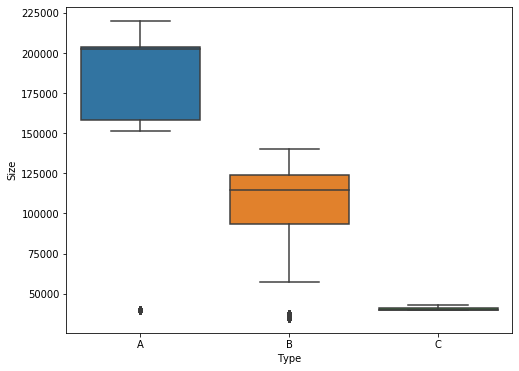

In [9]:
# boxplot for sizes vs types of stores
stype = pd.concat([data['Type'], data['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=data)

### Looking at boxplot and pie chart, we can say that type A store is the largest store and C is the smallest.

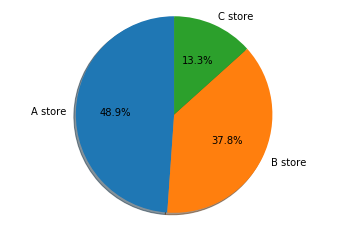

In [10]:
labels = 'A store','B store','C store'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

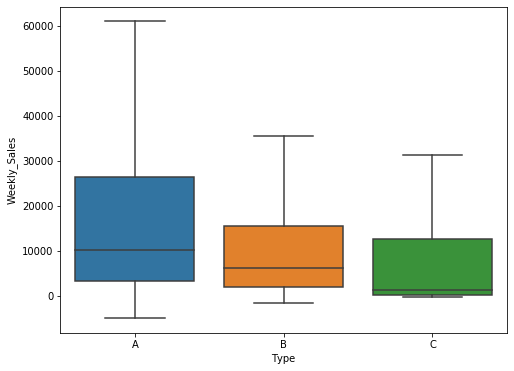

In [11]:
store_sale = pd.concat([data['Type'], data['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=data, showfliers=False)

### This proves that larger the store size, higher the sales. Also most of the stores in data belong to ‘A’ and ‘B’ type

In [12]:
# lets define a common function to plot scatterplot
def scatterplot(data,column):
    plt.figure(figsize=(18, 6))
    plt.scatter(data[column] , data['Weekly_Sales'])
    plt.ylabel('weekly_Sales', fontsize = 13)
    plt.xlabel(column, fontsize = 13)

#### Scatterplot of each predictor with response variable "Weekly sales"

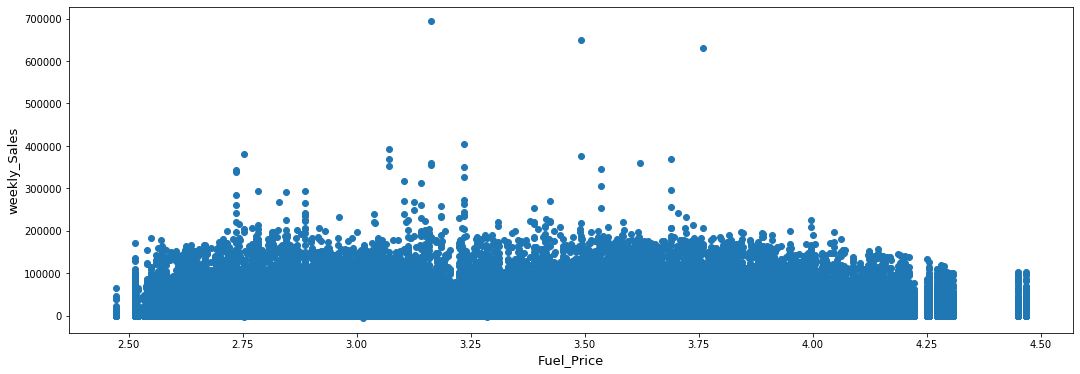

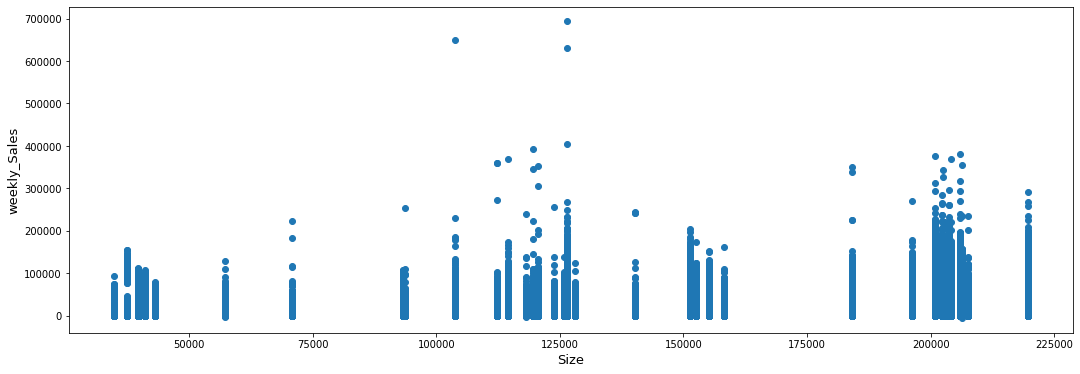

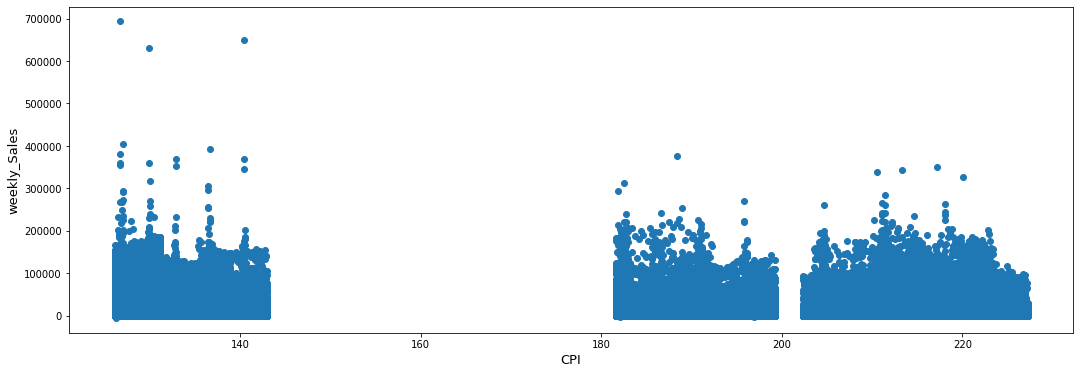

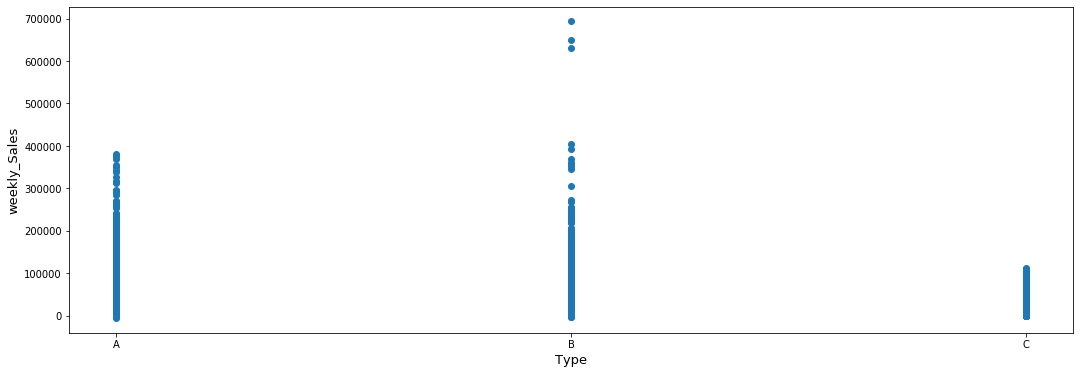

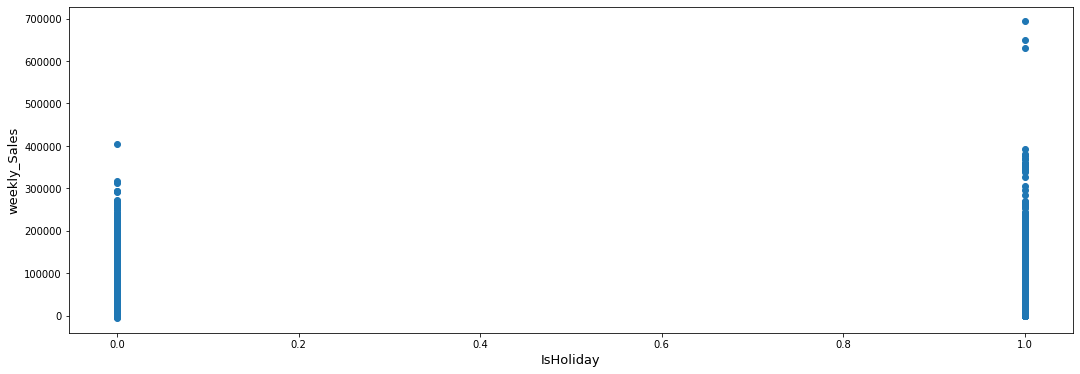

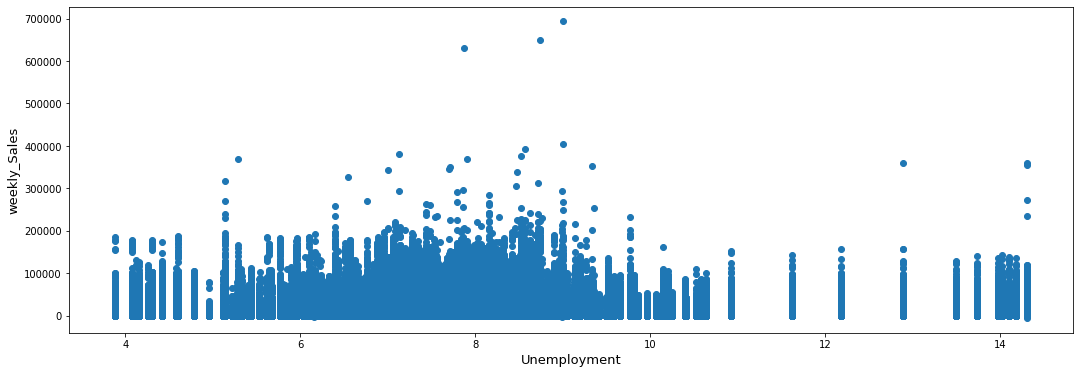

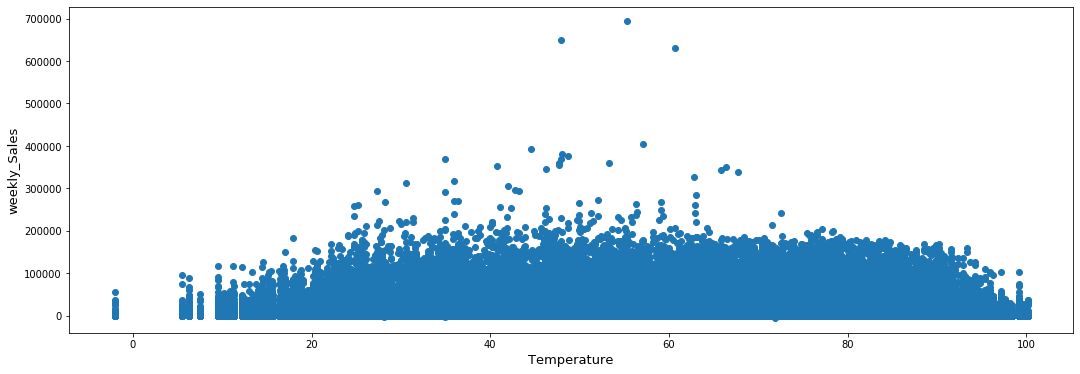

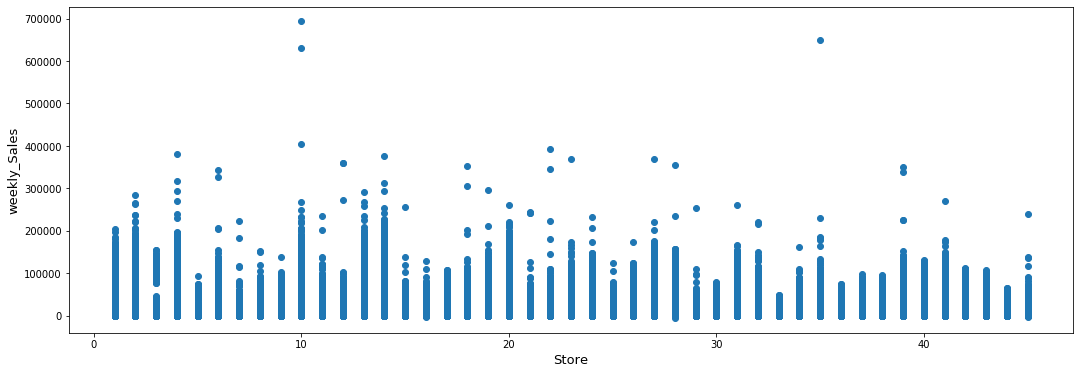

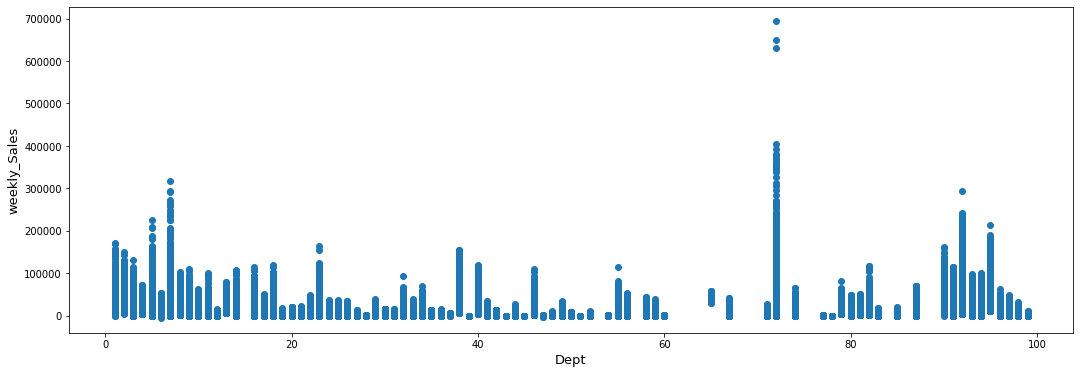

In [13]:
scatterplot(data, 'Fuel_Price') #Scatterplot of Fuel Price Vs Weekly Sales
scatterplot(data, 'Size') #Scatterplot of Size Vs Weekly Sales
scatterplot(data, 'CPI') #Scatterplot of CPI Vs Weekly Sales
scatterplot(data, 'Type') #Scatterplot of Type Vs Weekly Sales
scatterplot(data, 'IsHoliday')  #Scatterplot of Holiday Vs Weekly Sales
scatterplot(data, 'Unemployment') #Scatterplot of Unemployment Vs Weekly Sales
scatterplot(data, 'Temperature') #Scatterplot of Temperature Vs Weekly Sales
scatterplot(data, 'Store') #Scatterplot of Store Vs Weekly Sales
scatterplot(data, 'Dept') #Scatterplot of Dept Vs Weekly Sales

#### Correlation matrix

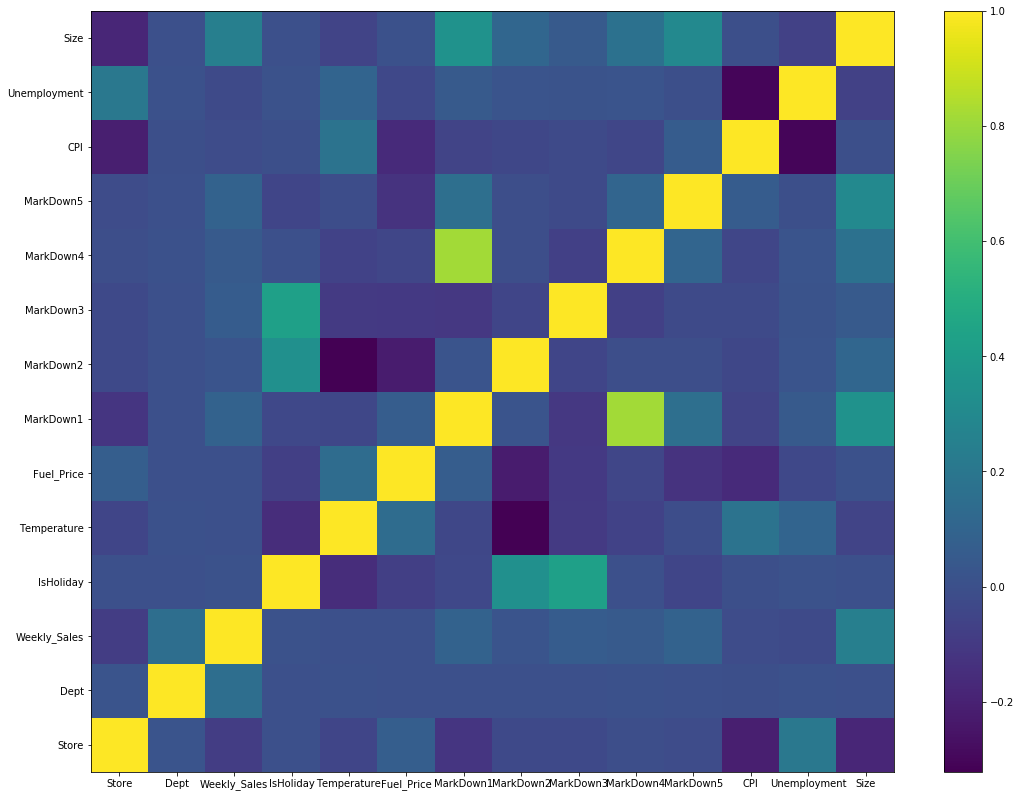

In [14]:
# this peice of code prints correlation matrix of all features
figure = plt.figure(figsize=(18, 14))
corr_score = data.corr()
c = plt.pcolor(corr_score)
plt.yticks(np.arange(0.5, len(corr_score.index), 1), corr_score.index)
plt.xticks(np.arange(0.5, len(corr_score.columns), 1), corr_score.columns)
figure.colorbar(c)
plt.show()

#### Heatmap showing correlation between each feature

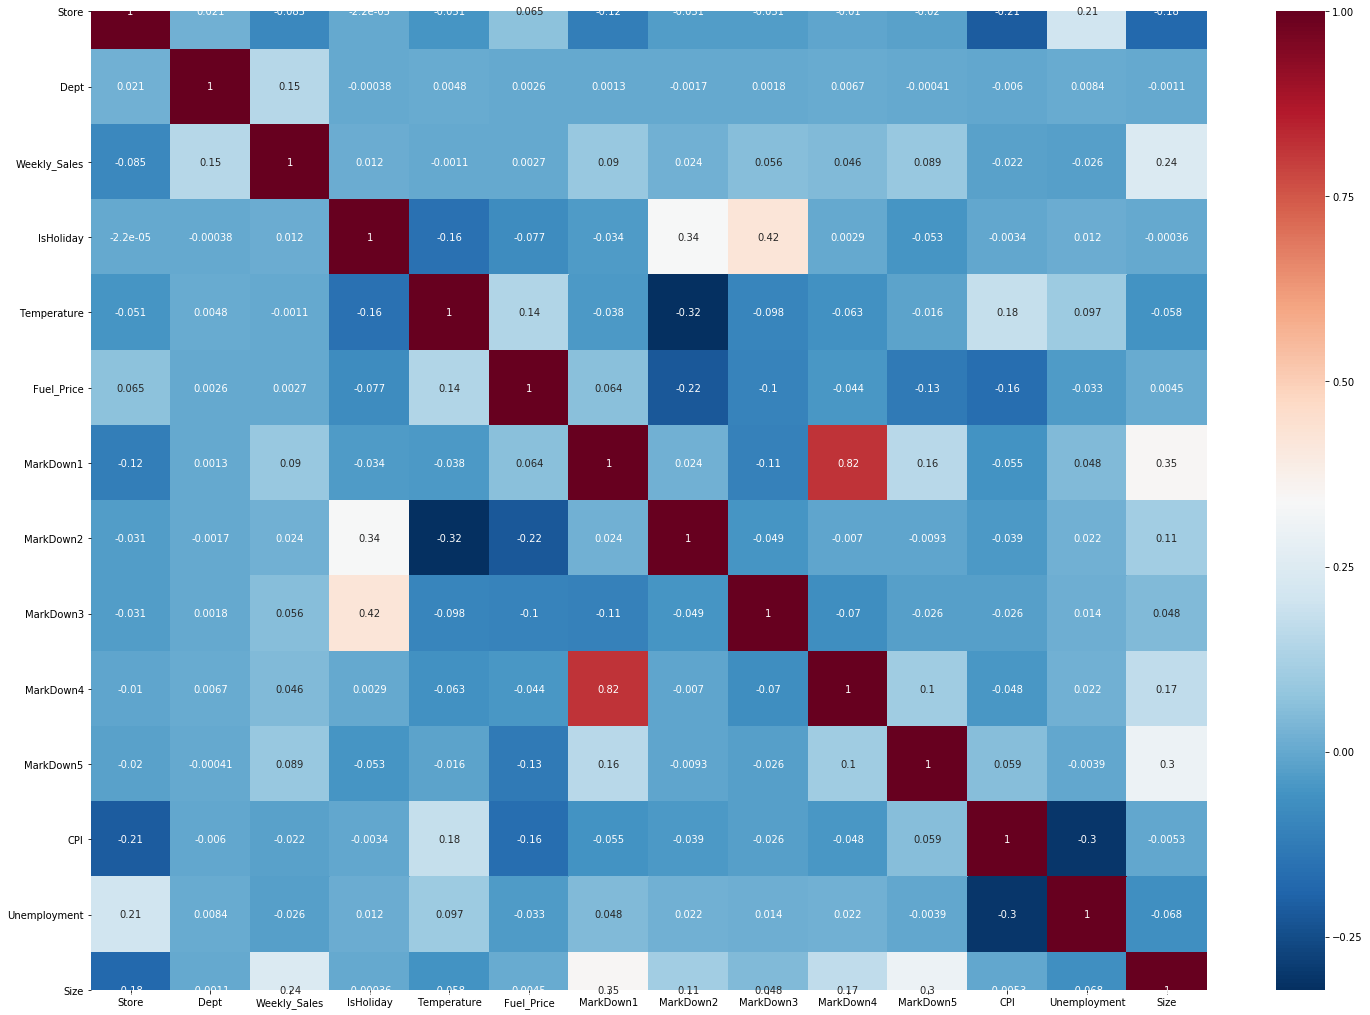

In [15]:
#  lets visualize the correlation matrix using a heatmap in seaborn
figure = plt.figure(figsize=(25, 18))
sns.heatmap(corr_score,
            xticklabels=corr_score.columns,
            yticklabels=corr_score.columns,
            cmap='RdBu_r',
            annot=True,)

plt.show()

#### Pairplot of continuous variables

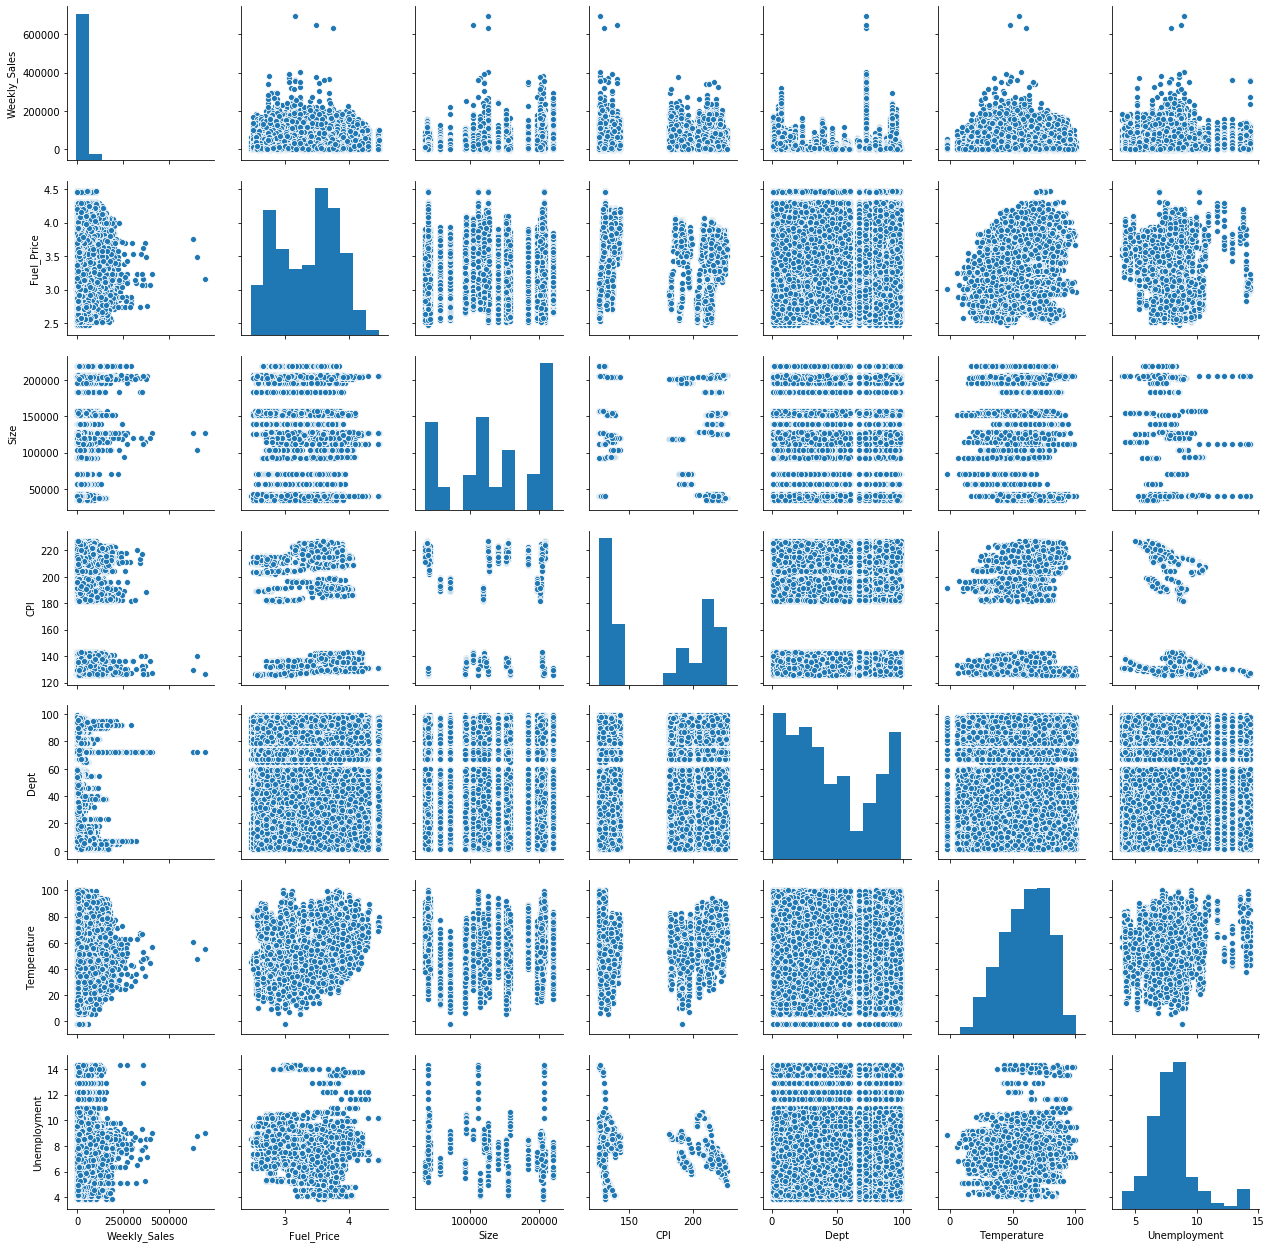

In [16]:
sns.pairplot(data, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

#### Pairplot of categorical variables

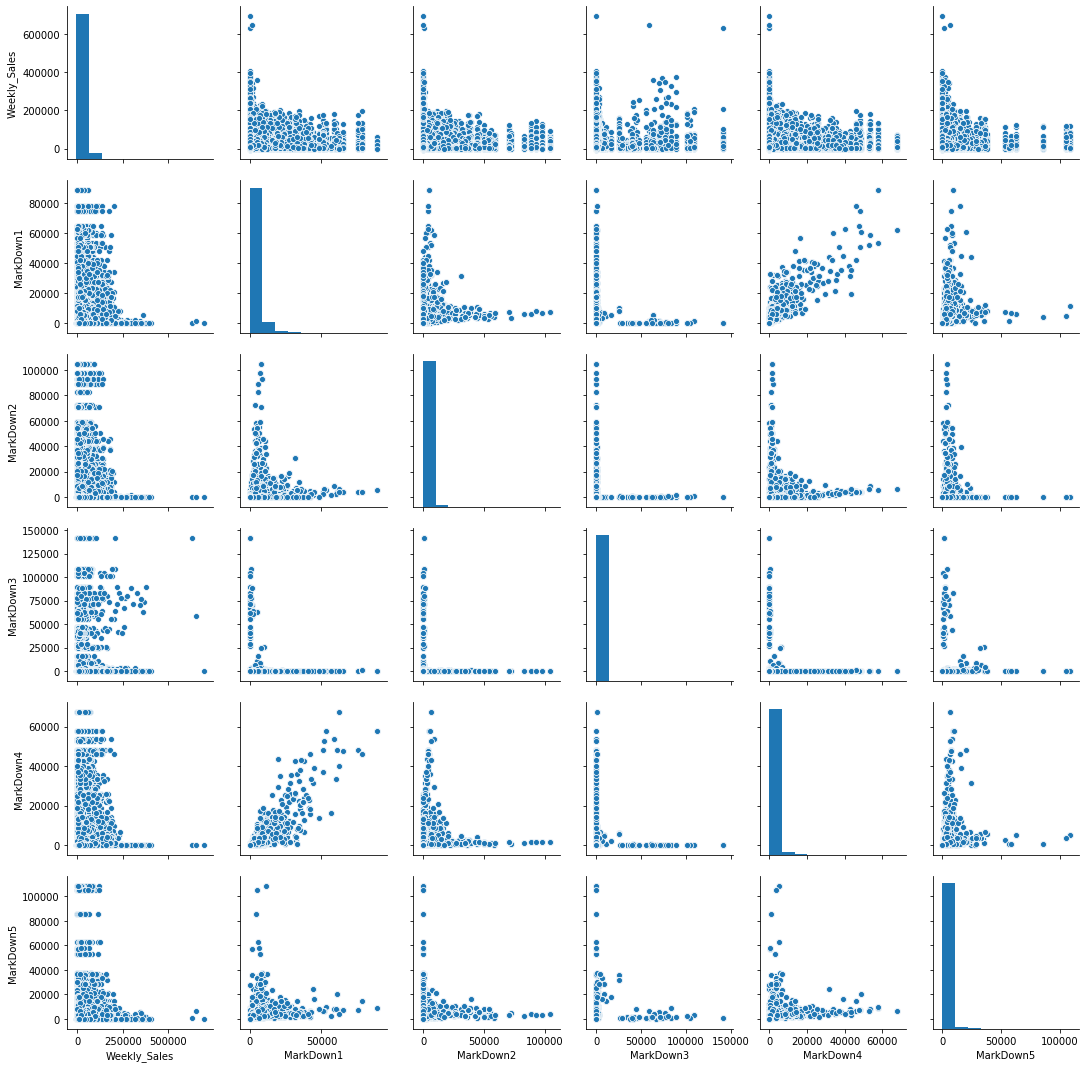

In [17]:
sns.pairplot(data.fillna(0), vars=['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

In [18]:
#Since Type is a categorical variable, lets split it into columns
data = pd.get_dummies(data, columns=["Type"])
data[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = data[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C
0,26,92,2011-08-26,87235.57,False,61.10,3.796,0.00,0.0,0.0,0.00,0.00,136.213613,7.767,152513,1,0,0
1,34,22,2011-03-25,5945.97,False,53.11,3.480,0.00,0.0,0.0,0.00,0.00,128.616064,10.398,158114,1,0,0
2,21,28,2010-12-03,1219.89,False,50.43,2.708,0.00,0.0,0.0,0.00,0.00,211.265543,8.163,140167,0,1,0
3,8,9,2010-09-17,11972.71,False,75.32,2.582,0.00,0.0,0.0,0.00,0.00,214.878556,6.315,155078,1,0,0
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,0.0,11.5,1705.28,3600.79,138.106581,8.150,203819,1,0,0


In [19]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C
0,26,92,2011-08-26,87235.57,False,61.10,3.796,0.00,0.0,0.0,0.00,0.00,136.213613,7.767,152513,1,0,0
1,34,22,2011-03-25,5945.97,False,53.11,3.480,0.00,0.0,0.0,0.00,0.00,128.616064,10.398,158114,1,0,0
2,21,28,2010-12-03,1219.89,False,50.43,2.708,0.00,0.0,0.0,0.00,0.00,211.265543,8.163,140167,0,1,0
3,8,9,2010-09-17,11972.71,False,75.32,2.582,0.00,0.0,0.0,0.00,0.00,214.878556,6.315,155078,1,0,0
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,0.0,11.5,1705.28,3600.79,138.106581,8.150,203819,1,0,0


In [20]:
# creating Month column
data['Month'] = pd.to_datetime(data['Date']).dt.month

### Dropping columns based on correlation

In [21]:
data = data.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'MarkDown4'])

In [22]:
data.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown5,Size,Type_A,Type_B,Type_C,Month
0,26,92,87235.57,False,61.10,0.00,0.0,0.0,0.00,152513,1,0,0,8
1,34,22,5945.97,False,53.11,0.00,0.0,0.0,0.00,158114,1,0,0,3
2,21,28,1219.89,False,50.43,0.00,0.0,0.0,0.00,140167,0,1,0,12
3,8,9,11972.71,False,75.32,0.00,0.0,0.0,0.00,155078,1,0,0,9
4,19,55,8271.82,False,58.81,12613.98,0.0,11.5,3600.79,203819,1,0,0,5


### Models for forecasting

In [23]:
def knn():
    knn = KNeighborsRegressor(n_neighbors=10)
    return knn

def randomForest():
    random = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=1)
    return random

def predict_(m, test_x):
    return pd.Series(m.predict(test_x))

def model_():
    return knn()
    #return randomForest()    

def train_(train_x, train_y):
    m = model_()
    m.fit(train_x, train_y)
    return m

def trainandpredict(train_x, train_y, test_x):
    m = train_(train_x, train_y)
    return predict_(m, test_x), m

### Caculating the model error to compare the best model

In [24]:
def calculateerror(test_y, predicted, weights):
    return mean_absolute_error(test_y, predicted, sample_weight=weights)

In [25]:
"""def calculate_r2(test_y,predicted):
    return r2_score(test_y, predicted)"""

'def calculate_r2(test_y,predicted):\n    return r2_score(test_y, predicted)'

### K-Fold cross validation

In [26]:
kf = KFold(n_splits=5)
splited = []
for name, group in data.groupby(["Store", "Dept"]):
    group = group.reset_index(drop=True)
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    if group.shape[0] <= 5:
        f = np.array(range(5))
        np.random.shuffle(f)
        group['fold'] = f[:group.shape[0]]
        continue
    fold = 0
    for train_index, test_index in kf.split(group):
        group.loc[test_index, 'fold'] = fold
        fold += 1
    splited.append(group)

split_data = pd.concat(splited).reset_index(drop=True)

In [27]:
split_data.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown5,Size,Type_A,Type_B,Type_C,Month,fold
0,1,1,16119.92,False,85.05,11436.22,245.00,6.85,4836.22,151315,1,0,0,8,0.0
1,1,1,17688.76,False,80.48,0.00,0.00,0.00,0.00,151315,1,0,0,7,0.0
2,1,1,18322.37,True,83.96,5204.68,35.74,50.94,2737.17,151315,1,0,0,9,0.0
3,1,1,16963.55,False,77.22,4039.39,0.00,745.19,3631.13,151315,1,0,0,5,0.0
4,1,1,31497.65,False,46.33,0.00,0.00,0.00,0.00,151315,1,0,0,12,0.0


### Running the model on the fold data 

In [28]:
best_model = None
error_cv = 0
best_error = np.iinfo(np.int32).max
for fold in range(5):
    dataset_train = split_data.loc[split_data['fold'] != fold]
    dataset_test = split_data.loc[split_data['fold'] == fold]
    train_y = dataset_train['Weekly_Sales']
    train_x = dataset_train.drop(columns=['Weekly_Sales', 'fold'])
    test_y = dataset_test['Weekly_Sales']
    test_x = dataset_test.drop(columns=['Weekly_Sales', 'fold'])
    print(dataset_train.shape, dataset_test.shape)
    predicted, model = trainandpredict(train_x, train_y, test_x)
    # giving weights in the data due to inbalance in the class of dataset for this column
    weights = test_x['IsHoliday'].replace(True, 5).replace(False, 1)
    error = calculateerror(test_y, predicted, weights)
    error_cv += error
    print(fold, error)
    if error < best_error:
        print('Best model')
        best_error = error
        best_model = model

# taking average of the error for all the folds
error_cv /= 5

(224419, 15) (57690, 15)
0 10906.110869450848
Best model
(225047, 15) (57062, 15)
1 11066.211803518343
(225671, 15) (56438, 15)
2 10939.047792111762
(226322, 15) (55787, 15)
3 10922.37056315178
(226977, 15) (55132, 15)
4 11007.582873753543


### Shows the model that has been used for the forecasting

In [29]:
model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

### Best value of mean absolute error for the model

In [30]:
best_error

10906.110869450848

## Testing the algorithm on the test data set

In [31]:
test_data='test.csv'
dataset_test= pd.read_csv(test_data)

### Pre processing for test data set

In [32]:
data_test = pd.get_dummies(dataset_test, columns=["Type"])
data_test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = data_test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
data_test = data_test.fillna(0) # replacing NULL values with 0 value
column_date = data_test['Date']
data_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C
0,28,40,2012-01-06,False,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.50,130.157516,12.187,206302,1,0,0
1,18,93,2012-03-09,False,38.10,3.876,7410.18,368.19,25.46,1852.39,2332.07,137.506690,8.075,120653,0,1,0
2,38,4,2011-05-27,False,76.67,4.087,0.00,0.00,0.00,0.00,0.00,129.062355,13.736,39690,0,0,1
3,29,33,2010-03-12,False,43.43,2.805,0.00,0.00,0.00,0.00,0.00,131.784000,10.064,93638,0,1,0
4,13,52,2010-10-29,False,45.12,2.841,0.00,0.00,0.00,0.00,0.00,126.436419,7.795,219622,1,0,0


In [33]:
data_test['Month'] = pd.to_datetime(data_test['Date']).dt.month
data_test = data_test.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'MarkDown4'])

In [34]:
data_test.head()

,Store,Dept,IsHoliday,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown5,Size,Type_A,Type_B,Type_C,Month
0,28,40,False,50.43,5155.86,19549.51,218.29,5218.50,206302,1,0,0,1
1,18,93,False,38.10,7410.18,368.19,25.46,2332.07,120653,0,1,0,3
2,38,4,False,76.67,0.00,0.00,0.00,0.00,39690,0,0,1,5
3,29,33,False,43.43,0.00,0.00,0.00,0.00,93638,0,1,0,3
4,13,52,False,45.12,0.00,0.00,0.00,0.00,219622,1,0,0,10


### Predicting for the test data using the best model from the training set

In [35]:
predicted_test = best_model.predict(data_test)

### Appending the forecasting sales to the main test data set

In [36]:
data_test['Weekly_Sales'] = predicted_test
data_test['Date'] = column_date

In [37]:
data_test.head()

,Store,Dept,IsHoliday,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown5,Size,Type_A,Type_B,Type_C,Month,Weekly_Sales,Date
0,28,40,False,50.43,5155.86,19549.51,218.29,5218.50,206302,1,0,0,1,7793.571,2012-01-06
1,18,93,False,38.10,7410.18,368.19,25.46,2332.07,120653,0,1,0,3,13499.324,2012-03-09
2,38,4,False,76.67,0.00,0.00,0.00,0.00,39690,0,0,1,5,3666.405,2011-05-27
3,29,33,False,43.43,0.00,0.00,0.00,0.00,93638,0,1,0,3,5705.899,2010-03-12
4,13,52,False,45.12,0.00,0.00,0.00,0.00,219622,1,0,0,10,3995.396,2010-10-29


In [38]:
split_data.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown5,Size,Type_A,Type_B,Type_C,Month,fold
0,1,1,16119.92,False,85.05,11436.22,245.00,6.85,4836.22,151315,1,0,0,8,0.0
1,1,1,17688.76,False,80.48,0.00,0.00,0.00,0.00,151315,1,0,0,7,0.0
2,1,1,18322.37,True,83.96,5204.68,35.74,50.94,2737.17,151315,1,0,0,9,0.0
3,1,1,16963.55,False,77.22,4039.39,0.00,745.19,3631.13,151315,1,0,0,5,0.0
4,1,1,31497.65,False,46.33,0.00,0.00,0.00,0.00,151315,1,0,0,12,0.0


In [39]:
split_data.IsHoliday = split_data.IsHoliday.astype(int)
split_data.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown5,Size,Type_A,Type_B,Type_C,Month,fold
0,1,1,16119.92,0,85.05,11436.22,245.00,6.85,4836.22,151315,1,0,0,8,0.0
1,1,1,17688.76,0,80.48,0.00,0.00,0.00,0.00,151315,1,0,0,7,0.0
2,1,1,18322.37,1,83.96,5204.68,35.74,50.94,2737.17,151315,1,0,0,9,0.0
3,1,1,16963.55,0,77.22,4039.39,0.00,745.19,3631.13,151315,1,0,0,5,0.0
4,1,1,31497.65,0,46.33,0.00,0.00,0.00,0.00,151315,1,0,0,12,0.0


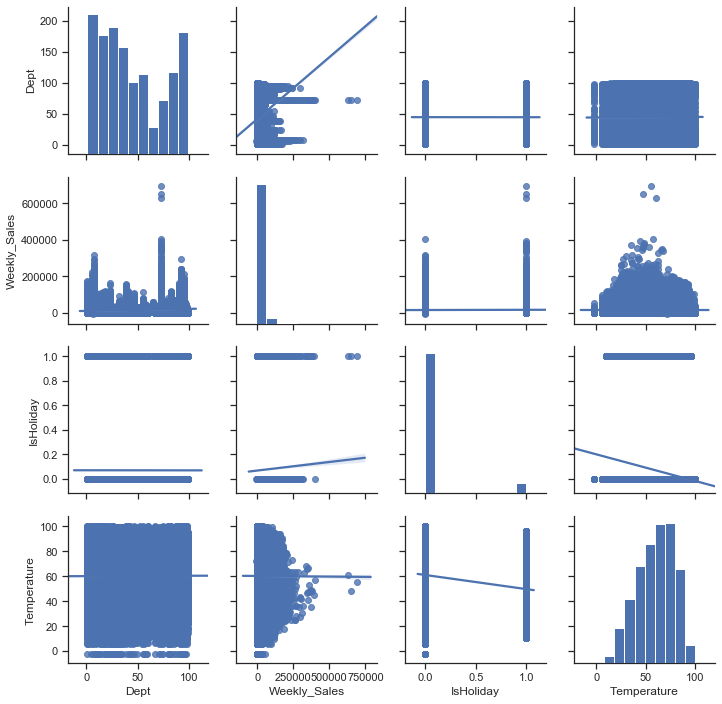

In [40]:
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

sns.set(style='ticks')
sns.pairplot(split_data.iloc[:,1:5], kind= 'reg')


### Using StatsModels to fit the following two regression models to the data

#### Model 1: The predictors are (1) Store (2) Holiday (3) Department (4) Temperature (5) MarkDown1 (6) MarkDown2 (7) MarkDown3 (8) MarkDown5 (9) Type A (10) Type B (11) Type C and (12) Month.

In [41]:
model_d = 'Weekly_Sales ~ Store+IsHoliday +Dept+ Temperature +MarkDown1+MarkDown2+MarkDown3+MarkDown5+Type_A+Type_B+Type_C+Month'
result = smf.ols(formula = model_d, data=split_data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1795.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:44:00   Log-Likelihood:            -3.2199e+06
No. Observations:              282109   AIC:                         6.440e+06
Df Residuals:                  282097   BIC:                         6.440e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9253.5955    156.058     59.296      

#### Model 2: The predictors are (1) Store (2) Department (3) Temperature (4) MarkDown1 (5) MarkDown3 (6) MarkDown5 (6) Type A (7) Type B and (8) Type C.

In [42]:
model_d = 'Weekly_Sales ~ Store +Dept+ Temperature +MarkDown1+MarkDown3+MarkDown5+Type_A+Type_B+Type_C'
result = smf.ols(formula = model_d, data=split_data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     2433.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:44:00   Log-Likelihood:            -3.2201e+06
No. Observations:              282109   AIC:                         6.440e+06
Df Residuals:                  282100   BIC:                         6.440e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9826.1182    149.517     65.719      

In [43]:
#X=split_data[['Store','Dept', 'Temperature' ,'MarkDown1','MarkDown3','MarkDown5','Type_A','Type_B','Type_C']]
#y=split_data[['Weekly_Sales']]

X=split_data[['Temperature','MarkDown1','MarkDown2','MarkDown3','MarkDown5']]
y=split_data[['Weekly_Sales']]

X

,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown5
0,85.05,11436.22,245.00,6.85,4836.22
1,80.48,0.00,0.00,0.00,0.00
2,83.96,5204.68,35.74,50.94,2737.17
3,77.22,4039.39,0.00,745.19,3631.13
4,46.33,0.00,0.00,0.00,0.00
...,...,...,...,...,...
282104,50.02,0.00,0.00,0.00,0.00
282105,50.19,6835.61,120.76,802.79,17861.50
282106,67.21,5370.39,0.00,361.22,2461.81
282107,51.83,4736.94,6047.12,16.68,2246.12


### Applying train/test split method(random_state of 2) and using scikit-learn to fit the regression models

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 2)

X_test

,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown5
206434,33.40,11929.81,4330.70,10.10,2785.63
278847,50.04,9866.15,206.18,3.25,1561.56
108876,54.94,0.00,0.00,0.00,0.00
250820,41.39,0.00,0.00,0.00,0.00
114446,75.71,0.00,0.00,0.00,0.00
...,...,...,...,...,...
254030,28.60,0.00,0.00,0.00,0.00
13488,87.12,0.00,0.00,0.00,0.00
82581,75.95,0.00,0.00,0.00,0.00
190518,65.14,0.00,0.00,0.00,0.00


In [45]:
# let's build the model using only the training set

from sklearn import linear_model, metrics

lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

y_pred

Rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print('RMSE for model:',Rmse)


RMSE for model: 22982.132733856713


In [46]:
model_fitted_y = result.fittedvalues
# model residuals
model_residuals = result.resid

In [47]:
#sns.residplot(model_fitted_y, model_residuals)

# 2nd run of model after removing store type

In [48]:
new_data=data.drop(columns=['Type_A','Type_B','Type_C'])

new_data.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown5,Size,Month
0,26,92,87235.57,False,61.10,0.00,0.0,0.0,0.00,152513,8
1,34,22,5945.97,False,53.11,0.00,0.0,0.0,0.00,158114,3
2,21,28,1219.89,False,50.43,0.00,0.0,0.0,0.00,140167,12
3,8,9,11972.71,False,75.32,0.00,0.0,0.0,0.00,155078,9
4,19,55,8271.82,False,58.81,12613.98,0.0,11.5,3600.79,203819,5


## K fold for new data 

In [49]:
kf = KFold(n_splits=5)
splited = []
for name, group in new_data.groupby(["Store", "Dept"]):
    group = group.reset_index(drop=True)
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    if group.shape[0] <= 5:
        f = np.array(range(5))
        np.random.shuffle(f)
        group['fold'] = f[:group.shape[0]]
        continue
    fold = 0
    for train_index, test_index in kf.split(group):
        group.loc[test_index, 'fold'] = fold
        fold += 1
    splited.append(group)

split_data = pd.concat(splited).reset_index(drop=True)

In [50]:
split_data.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown5,Size,Month,fold
0,1,1,16119.92,False,85.05,11436.22,245.00,6.85,4836.22,151315,8,0.0
1,1,1,17688.76,False,80.48,0.00,0.00,0.00,0.00,151315,7,0.0
2,1,1,18322.37,True,83.96,5204.68,35.74,50.94,2737.17,151315,9,0.0
3,1,1,16963.55,False,77.22,4039.39,0.00,745.19,3631.13,151315,5,0.0
4,1,1,31497.65,False,46.33,0.00,0.00,0.00,0.00,151315,12,0.0


In [51]:
best_model = None
error_cv = 0
best_error = np.iinfo(np.int32).max
for fold in range(5):
    dataset_train = split_data.loc[split_data['fold'] != fold]
    dataset_test = split_data.loc[split_data['fold'] == fold]
    train_y = dataset_train['Weekly_Sales']
    train_x = dataset_train.drop(columns=['Weekly_Sales', 'fold'])
    test_y = dataset_test['Weekly_Sales']
    test_x = dataset_test.drop(columns=['Weekly_Sales', 'fold'])
    print(dataset_train.shape, dataset_test.shape)
    predicted, model = trainandpredict(train_x, train_y, test_x)
    # giving weights in the data due to inbalance in the class of dataset for this column
    weights = test_x['IsHoliday'].replace(True, 5).replace(False, 1)
    error = calculateerror(test_y, predicted, weights)
    error_cv += error
    print(fold, error)
    if error < best_error:
        print('Best model')
        best_error = error
        best_model = model

# taking average of the error for all the folds
error_cv /= 5

(224419, 12) (57690, 12)
0 10907.68148938305
Best model
(225047, 12) (57062, 12)
1 11065.058794586117
(225671, 12) (56438, 12)
2 10939.29520331012
(226322, 12) (55787, 12)
3 10922.61599266507
(226977, 12) (55132, 12)
4 11006.54481592068


In [52]:
model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [53]:
best_error

10907.68148938305